In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned dataset
df = pd.read_csv('cleaned_student_depression.csv')


In [3]:
# split the data set into independent and dependent variables
X = df.drop(columns=['Depression'])
y = df['Depression']
 

In [4]:
# split data into train and test data set, no validation set, because to use cross validation 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [5]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  Column groups
onehot_cols = ['Gender', 'Profession', 'Degree','Suicidal_Thoughts', 'Mental_Illness_History']
ordinal_cols = ['Sleep_Duration', 'Dietary_Habits']

# Define category orders for ordinal features
ordinal_categories = [
    ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'],  
    ['Unhealthy', 'Moderate', 'Healthy']                                                                                                 # Mental_Illness_History
]

# Define ColumnTransformer
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first', sparse_output=False), onehot_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols)
    ],
    remainder='passthrough' 
)



In [6]:
# validate the base model through cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the new model pipeline with preprocessing and logistic regression for cross validation
pipeline = Pipeline([
    ('preprocessing', encoder),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000, random_state=42))
])

# Define stratified k-fold cross-validator with k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [7]:
# Precision
precision_cv = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='precision')
print("Precision of each fold:", precision_cv)
print("Average Precision:", precision_cv.mean())

Precision of each fold: [0.85619469 0.86343284 0.85125775 0.85886792 0.85050205]
Average Precision: 0.8560510485954108


In [8]:
# Recall
recall_cv = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='recall')
print("Recall of each fold:", recall_cv)
print("Average Recall:", recall_cv.mean())

Recall of each fold: [0.88931444 0.88625048 0.89429337 0.87169667 0.87624521]
Average Recall: 0.8835600341026983


In [9]:
# F1 Score
f1_cv = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1')
print("F1 Score of each fold:", f1_cv)
print("Average F1 Score:", f1_cv.mean())

F1 Score of each fold: [0.87244035 0.87469287 0.87224505 0.86523475 0.86318173]
Average F1 Score: 0.8695589513910111


In [10]:
# Show unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col} : {df[col].nunique()}:\n {df[col].unique()}")

Gender : 2:
 ['Male' 'Female']
Profession : 2:
 ['Student' 'Other']
Sleep_Duration : 4:
 ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours']
Dietary_Habits : 3:
 ['Healthy' 'Moderate' 'Unhealthy']
Degree : 28:
 ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
Suicidal_Thoughts : 2:
 ['Yes' 'No']
Mental_Illness_History : 2:
 ['No' 'Yes']


In [11]:
## since degree column has has so many unique values so performing target encoding on this colum might improve the performance by reducing the risk of multidimensionality while using onehot encoding 

#### more feature engineering
##### 1.Target encoding on degree

In [12]:
import category_encoders as ce

In [13]:
onehot_cols = ['Gender', 'Profession', 'Suicidal_Thoughts', 'Mental_Illness_History']
target_encode_cols = ['Degree']  

In [14]:
target_encoder = ce.TargetEncoder(cols=target_encode_cols)

In [15]:
# Define ColumnTransformer
encoder = ColumnTransformer(
    transformers=[
        ('target', target_encoder, target_encode_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first', sparse_output=False), onehot_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols)
    ],
    remainder='passthrough' 
)

In [16]:
new_pipeline = Pipeline([
    ('preprocessing', encoder),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000, random_state=42))
])

In [18]:
# Precision
precision_cv_v1 = cross_val_score(new_pipeline, X_train,y_train, cv=skf, scoring='precision')
print("Precision of each fold:", precision_cv_v1)
print("Average Precision:", precision_cv_v1.mean())

Precision of each fold: [0.85366753 0.8641102  0.84914577 0.85612589 0.84957392]
Average Precision: 0.8545246598107189


In [19]:
# Recall
recall_cv_v1 = cross_val_score(new_pipeline, X_train, y_train, cv=skf, scoring='recall')
print("Recall of each fold:", recall_cv_v1)
print("Average Recall:", recall_cv_v1.mean())

Recall of each fold: [0.88701647 0.88893144 0.89467637 0.87514362 0.87854406]
Average Recall: 0.8848623932639834


In [20]:
# F1 Score
f1_cv_v1 = cross_val_score(new_pipeline, X_train, y_train, cv=skf, scoring='f1')
print("F1 Score of each fold:", f1_cv_v1)
print("Average F1 Score:", f1_cv_v1.mean())

F1 Score of each fold: [0.87002254 0.8763451  0.87131667 0.8655303  0.86381616]
Average F1 Score: 0.8694061555187573


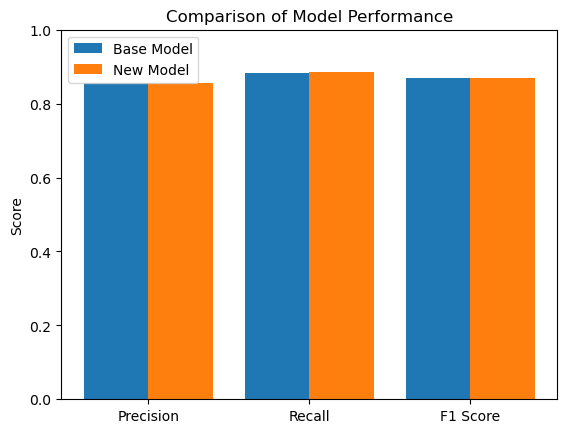

Model Performance Summary (Cross-Validation):
Precision:
  Base Model: 0.8561
  New Model : 0.8545
------------------------------
Recall:
  Base Model: 0.8836
  New Model : 0.8849
------------------------------
F1 Score:
  Base Model: 0.8696
  New Model : 0.8694
------------------------------


In [21]:
import matplotlib.pyplot as plt

# average scores
base_scores = [precision_cv.mean(), recall_cv.mean(), f1_cv.mean()]
new_scores = [precision_cv_v1.mean(), recall_cv_v1.mean(), f1_cv_v1.mean()]
metrics = ['Precision', 'Recall', 'F1 Score']

x = range(len(metrics))

plt.bar(x, base_scores, width=0.4, label='Base Model', align='center')
plt.bar([i + 0.4 for i in x], new_scores, width=0.4, label='New Model', align='center')

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.show()

print("Model Performance Summary (Cross-Validation):")
for i in range(len(metrics)):
    print(f"{metrics[i]}:")
    print(f"  Base Model: {base_scores[i]:.4f}")
    print(f"  New Model : {new_scores[i]:.4f}")
    print("-" * 30)


In [22]:
## performance have not changed because of target encoding, only the recall is increased at 3th decimal places. the precision and f1 sores have been reduced
## so the traget encoding  did not improved the model, it is better to stick to basic one hot encoding done in base model 

In [23]:
## in general on real world there is a high chance when a student has high pressure on academic side and has more study hours, the he has higher chance of depression
## so checking whether those features have a relationship then the default linear one can improve the performance of the model

#### 2. adding interaction terms

In [24]:
# Create copies of X_train and X_test to safely changing the data without altering the original one
X_train_int = X_train.copy()
X_test_int = X_test.copy()

In [ ]:
# Add the interaction term combine academic pressure and study hours
X_train_int['APxSH'] = X_train_int['Academic_Pressure'] * X_train_int['Study_Hours']


In [26]:
#e redefine the one hot encoding colums because previously removed degree from it
onehot_cols = ['Gender', 'Profession', 'Degree','Suicidal_Thoughts', 'Mental_Illness_History']

In [27]:
# redefing the  Preprocessor without target encoder
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), onehot_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols)
    ],
    remainder='passthrough'  # keep numeric + interaction features
)

In [28]:
# Rebuild the pipeline without target encoder
new_pipeline = Pipeline([
    ('preprocessing', encoder),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000, random_state=42))
])

In [34]:
# Precision
precision_cv_v2 = cross_val_score(new_pipeline, X_train_int,y_train, cv=skf, scoring='precision')
print("Precision of each fold:", precision_cv_v2)
print("Average Precision:", precision_cv_v2.mean())

Precision of each fold: [0.8558791  0.86241611 0.85094752 0.85859729 0.85070737]
Average Precision: 0.8557094772998287


In [35]:
# Recall
recall_cv_v2 = cross_val_score(new_pipeline, X_train_int, y_train, cv=skf, scoring='recall')
print("Recall of each fold:", recall_cv_v2)
print("Average Recall:", recall_cv_v2.mean())

Recall of each fold: [0.88931444 0.88586748 0.89429337 0.87207966 0.87547893]
Average Recall: 0.8834067773977174


In [42]:
# F1 Score
f1_cv_v2 = cross_val_score(new_pipeline, X_train_int, y_train, cv=skf, scoring='f1')
print("F1 Score of each fold:", f1_cv_v2)
print("Average F1 Score:", f1_cv_v2.mean())

F1 Score of each fold: [0.87244035 0.87469287 0.87224505 0.86523475 0.86318173]
Average F1 Score: 0.8695589513910111


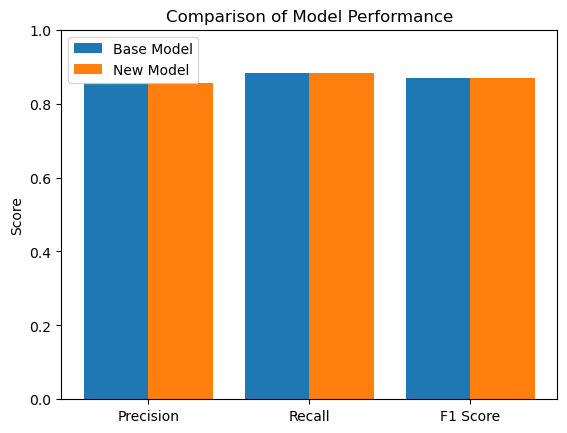

Model 2 Performance Summary (Cross-Validation):
Precision:
  Base Model: 0.8561
  New Model : 0.8557
------------------------------
Recall:
  Base Model: 0.8836
  New Model : 0.8834
------------------------------
F1 Score:
  Base Model: 0.8696
  New Model : 0.8693
------------------------------


In [37]:
import matplotlib.pyplot as plt

# average scores
base_scores = [precision_cv.mean(), recall_cv.mean(), f1_cv.mean()]
new_scores = [precision_cv_v2.mean(), recall_cv_v2.mean(), f1_cv_v2.mean()]
metrics = ['Precision', 'Recall', 'F1 Score']

x = range(len(metrics))

plt.bar(x, base_scores, width=0.4, label='Base Model', align='center')
plt.bar([i + 0.4 for i in x], new_scores, width=0.4, label='New Model', align='center')

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.show()

print("Model 2 Performance Summary (Cross-Validation):")
for i in range(len(metrics)):
    print(f"{metrics[i]}:")
    print(f"  Base Model: {base_scores[i]:.4f}")
    print(f"  New Model : {new_scores[i]:.4f}")
    print("-" * 30)


In [38]:
## no improvement at all by adding the interaction term combining scademic pressure and study hours, might be only the linear relationship between those